In [132]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
image = cv2.imread('chou.jpg')
# image = cv2.imread('plane_256x256.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

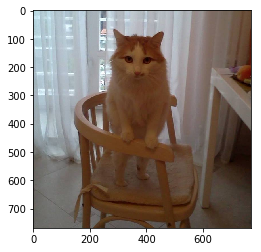

In [133]:
plt.imshow(image_rgb)

In [134]:
# image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

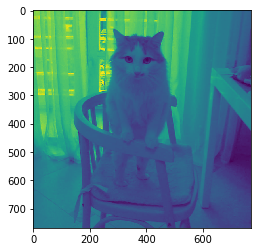

In [135]:
# plt.imshow(image_gray, cmap='gray')
plt.imshow(image_gray)

In [136]:
image_gray32 = np.float32(image_gray)

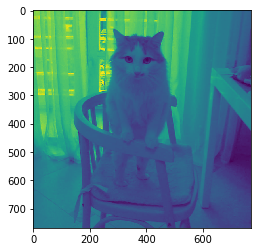

In [137]:
plt.imshow(image_gray32)

In [138]:
block_size = 2
aperture = 29
free_parameter = 0.04

In [139]:
detector_resposes = cv2.cornerHarris(image_gray,
                                    block_size,
                                    aperture,
                                    free_parameter)

In [140]:
detector_responses = cv2.dilate(detector_resposes, None)

In [141]:
threshold = 0.02
image_rgb[detector_responses > threshold * detector_responses.max()] = [255,255,255]

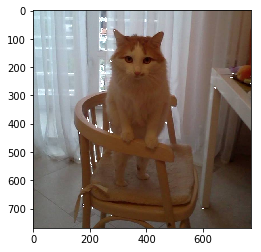

In [142]:
plt.imshow(image_rgb)

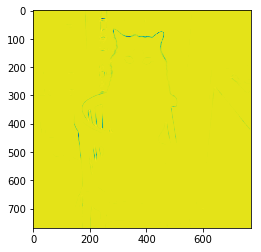

In [143]:
plt.imshow(detector_responses)

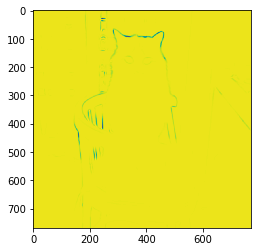

In [144]:
plt.imshow(detector_resposes)

In [145]:
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

In [146]:
corners = cv2.goodFeaturesToTrack(image_gray,
                                    corners_to_detect,
                                    minimum_quality_score,
                                    minimum_distance)

In [147]:
corners = np.float32(corners)

In [148]:
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_rgb, (x,y), 10, (255,255,255), -1)

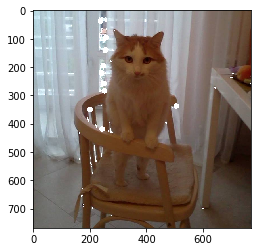

In [149]:
plt.imshow(image_rgb)